<a href="https://colab.research.google.com/github/s434/google-colab-projects/blob/main/Road_Lane_Detection/Road_Lane_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np


In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
img = cv2.imread("lines.png")


In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 75, 150)

In [ ]:
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 30, maxLineGap = 250)
print(lines)

[[[ 59  34 206  34]]

 [[ 59 104 206 104]]

 [[ 59 106 206 106]]

 [[ 59  36 206  36]]

 [[ 59 105  59  35]]

 [[206 105 206  35]]

 [[204 103 204  37]]

 [[ 61 103  61  37]]]


In [ ]:
for line in lines:
  x1, y1, x2, y2 = line[0]
  cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

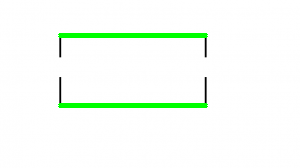

In [ ]:
cv2_imshow(img)

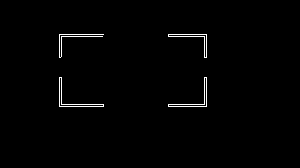

In [ ]:
cv2_imshow(edges)

In [ ]:
video = cv2.VideoCapture("road.mp4")

while True:
  ret, orig_frame = video.read()

  if not ret:
    video = cv2.VideoCapture("road.mp4")
    continue

  frame = cv2.GaussianBlur(orig_frame, (5, 5), 0)
  hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
  low_yellow = np.array([18, 94, 140])
  up_yellow = np.array([48, 255, 255])
  mask = cv2.inRange(hsv, low_yellow, up_yellow)
  edges = cv2.Canny(mask, 75, 150)

  lines = cv2.HoughLinesP(edges, 1, np.pi/180, 50, maxLineGap = 50)
  if lines is not None:
    for line in lines:
      x1, y1, x2, y2 = line[0]
      cv2.line(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)



In [ ]:
cv2_imshow(frame)